In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import kitcolors as kit

In [2]:
def f1(s):
    return np.exp(-s)
def sigma1(s):
    return 1


def f2(s):
    return s*np.exp(-s)
def sigma2(s):
    return s/(1+s)

def f3(s,s0=1,alpha=3):
    if s <= s0:
        return 0
    else:
        return alpha*s0**alpha/s**(1+alpha)
def sigma3(s,s0=1,alpha=3):
    if s <= s0:
        return 0
    else:
        return alpha/s

def f4(s):
    return 2*np.exp(-2*s)
def sigma4(s):
    return 2
    
    
def fill(s,f):
    z = np.empty_like(s)
    for i,si in enumerate(s):
        z[i] = f(si)
    return z

In [3]:
n = 1000
s = np.linspace(0,5,n)

f3_12 = lambda s: f3(s,s0=1,alpha=3)
sigma3_12 = lambda s: sigma3(s,s0=1,alpha=3)

fs = {"$p_1(s)$":f1, "$p_2(s)$":f4,"$p_3(s)$":f2, "$p_4(s)$":f3_12}
sigmas = {"$\sigma_1(s)$":sigma1, "$\sigma_2(s)$":sigma4,"$\sigma_3(s)$":sigma2, "$\sigma_4(s)$":sigma3_12}

(1.0000000000000002, 5.842606742906004e-11)
(0.9999999999999999, 1.547006406148436e-10)
(0.9999999999999998, 5.901457712308874e-10)
(0.9999999999999998, 1.2542366251482214e-12)


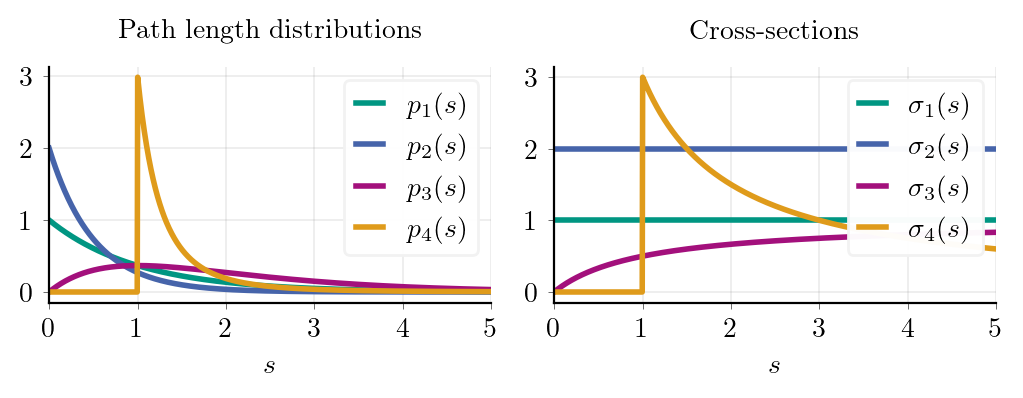

In [4]:
plt.style.use("kitish")
fig, axs = plt.subplots(1,2)

colors = [kit.green,kit.blue,kit.purple, kit.orange]

ax = axs[0]
for i,name in enumerate(fs):
    func = fs[name]
    z = fill(s,func)
    ax.plot(s,z,label = name, color = colors[i])
    print(quad(func, 0, np.inf))
ax.legend(loc ="upper right",ncol = 2)
ax.legend()
ax.set_xlabel("$s$")
ax.set_title("Path length distributions")
#ax.set_ylim(-0.,2.5)
ax = axs[1]
for i,name in enumerate(sigmas):
    func = sigmas[name]
    z = fill(s,func)
    ax.plot(s,z,label = name, color = colors[i])

#ax.set_ylim(-0.1,3)
ax.legend(loc ="upper right",ncol = 1)
ax.set_xlabel("$s$")
ax.set_title("Cross-sections")


plt.savefig("pdfvssigma.pdf")

In [5]:
def P(s,interfaces,fs):
  
  if s <=1e-13:
    return 0.0
  i = np.min(np.argwhere(s<=interfaces))
  si = interfaces[i]
  sim1 = interfaces[i-1]
  
  Pi = quad(fs[i-1],0,s-sim1)[0]
  Pim1 = P(sim1,interfaces,fs)
  
  return Pim1 + (1-Pim1)*Pi


In [6]:
interfaces = np.array([0.0,2, np.inf])
fs = [f2,f2]
Ps  = np.empty_like(s)
for j,sj in enumerate(s):
  Ps[j] = P(sj,interfaces,fs)

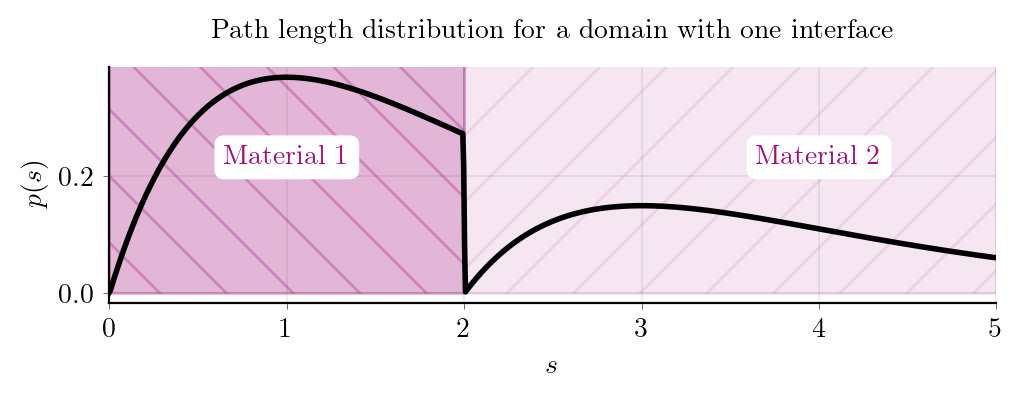

In [7]:
plt.style.use("kitish")
fig,ax = plt.subplots()
ax.plot(s,np.gradient(Ps,s),c=kit.black) 
#ax.axvline(2,color = kit.blue ,zorder = 2)
#ax.text(2.1,0.23,"Interface",color=kit.blue, rotation = 0 )
ax.set_xlabel("$s$")
ax.set_title("$p(s)$")


from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


c1 = kit.purple
c2 = kit.purple


ax.text(1,0.22,"Material $1$",ha="center",color= c1,
        bbox=dict(facecolor='white', edgecolor="w", boxstyle='round,pad=0.3'))
ax.text(4,0.22,"Material $2$",ha="center", color = c2,
       bbox=dict(facecolor="w", edgecolor="w", boxstyle='round,pad=0.3'))

rect = Rectangle((0,0),2,1)
pc = PatchCollection([rect], facecolor=c1, alpha=0.3,hatch='\\', edgecolor = kit.purple)
ax.add_collection(pc)
rect = Rectangle((2,0),3,1)
pc = PatchCollection([rect], facecolor=c2, alpha=0.1,hatch='/',edgecolor = kit.purple)
ax.add_collection(pc)
ax.set_ylabel("$p(s)$")
ax.set_title("Path length distribution for a domain with one interface")

plt.savefig("combinedpdf1.pdf")

In [8]:


n = 500
s = np.linspace(0,5,n)

interfaces = np.array([0.0,1,3,np.inf])
fs = [f2,f1,f3]
Ps  = np.empty_like(s)
for j,sj in enumerate(s):
  Ps[j] = P(sj,interfaces,fs)

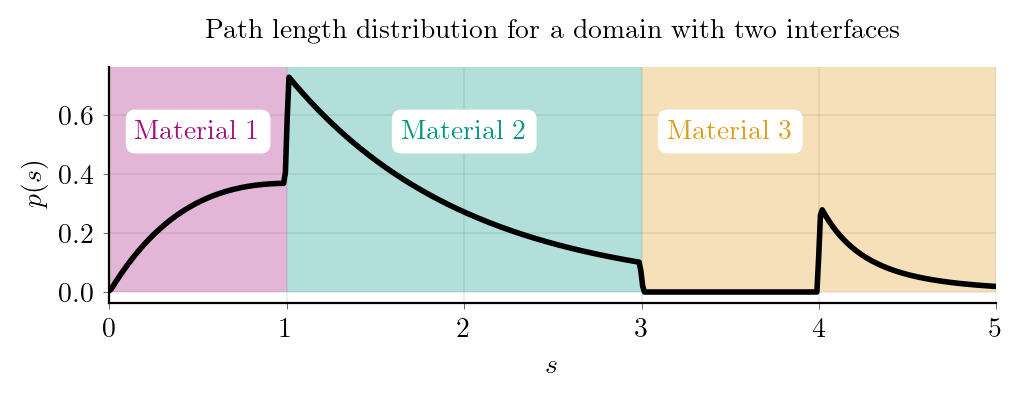

In [9]:
plt.style.use("kitish")
fig,ax = plt.subplots()
ax.plot(s,np.gradient(Ps,s),c=kit.black) 
#ax.axvline(2,color = kit.blue ,zorder = 2)
#ax.text(2.1,0.23,"Interface",color=kit.blue, rotation = 0 )
ax.set_xlabel("$s$")
ax.set_title("$p(s)$")




from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


c1 = kit.purple
c2 = kit.green
c3 = kit.orange

ax.text(0.5,0.52,"Material $1$",ha="center",color= c1,
        bbox=dict(facecolor='white', edgecolor="w", boxstyle='round,pad=0.3'))
ax.text(2,0.52,"Material $2$",ha="center", color = c2,
       bbox=dict(facecolor="w", edgecolor="w", boxstyle='round,pad=0.3'))
ax.text(3.5,0.52,"Material $3$",ha="center", color = c3,
       bbox=dict(facecolor="w", edgecolor="w", boxstyle='round,pad=0.3'))


rect = Rectangle((0,0),1,1)
pc = PatchCollection([rect], facecolor=c1, alpha=0.3)
ax.add_collection(pc)
rect = Rectangle((1,0),2,1)
pc = PatchCollection([rect], facecolor=c2, alpha=0.3)
ax.add_collection(pc)
rect = Rectangle((3,0),3,1)
pc = PatchCollection([rect], facecolor=c3, alpha=0.3)
ax.add_collection(pc)


ax.set_ylabel("$p(s)$")
ax.set_title("Path length distribution for a domain with two interfaces")

plt.savefig("combinedpdf2.pdf")

In [10]:

def S(s,interfaces,sigmas): 
  i = np.min(np.argwhere(s<=interfaces))
  si = interfaces[i]
  sim1 = interfaces[i-1]
  return sigmas[i-1](s-sim1)


In [11]:


n = 500
s = np.linspace(0,5,n)

interfaces = np.array([0.0,1,3,np.inf])
Sigmas = [sigma2,sigma1,sigma3]
Ss  = np.empty_like(s)
for j,sj in enumerate(s):
  Ss[j] = S(sj,interfaces,Sigmas)

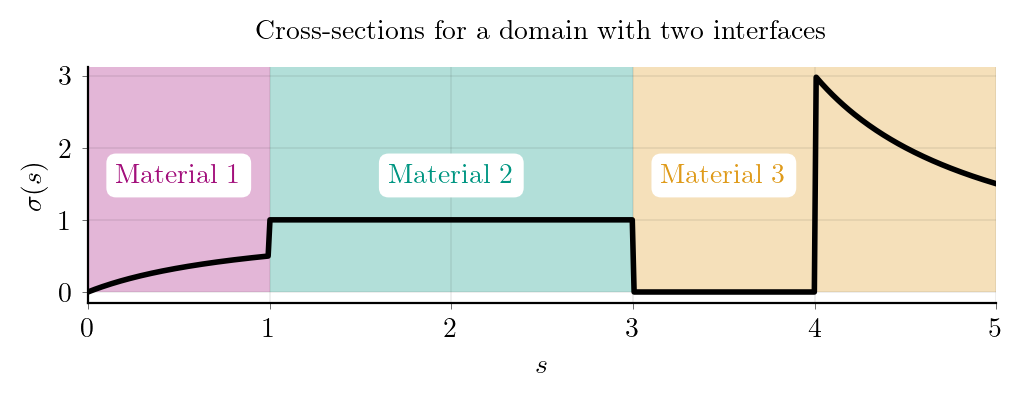

In [12]:
plt.style.use("kitish")
fig,ax = plt.subplots()
ax.plot(s,Ss,c=kit.black) 
#ax.axvline(2,color = kit.blue ,zorder = 2)
#ax.text(2.1,0.23,"Interface",color=kit.blue, rotation = 0 )
ax.set_xlabel("$s$")
ax.set_title("$p(s)$")




from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


c1 = kit.purple
c2 = kit.green
c3 = kit.orange

ax.text(0.5,1.52,"Material $1$",ha="center",color= c1,
        bbox=dict(facecolor='white', edgecolor="w", boxstyle='round,pad=0.3'))
ax.text(2,1.52,"Material $2$",ha="center", color = c2,
       bbox=dict(facecolor="w", edgecolor="w", boxstyle='round,pad=0.3'))
ax.text(3.5,1.52,"Material $3$",ha="center", color = c3,
       bbox=dict(facecolor="w", edgecolor="w", boxstyle='round,pad=0.3'))


rect = Rectangle((0,0),1,11)
pc = PatchCollection([rect], facecolor=c1, alpha=0.3)
ax.add_collection(pc)
rect = Rectangle((1,0),2,11)
pc = PatchCollection([rect], facecolor=c2, alpha=0.3)
ax.add_collection(pc)
rect = Rectangle((3,0),3,11)
pc = PatchCollection([rect], facecolor=c3, alpha=0.3)
ax.add_collection(pc)


ax.set_ylabel("$\sigma(s)$")
ax.set_title("Cross-sections for a domain with two interfaces")

plt.savefig("combinedpdf3.pdf")

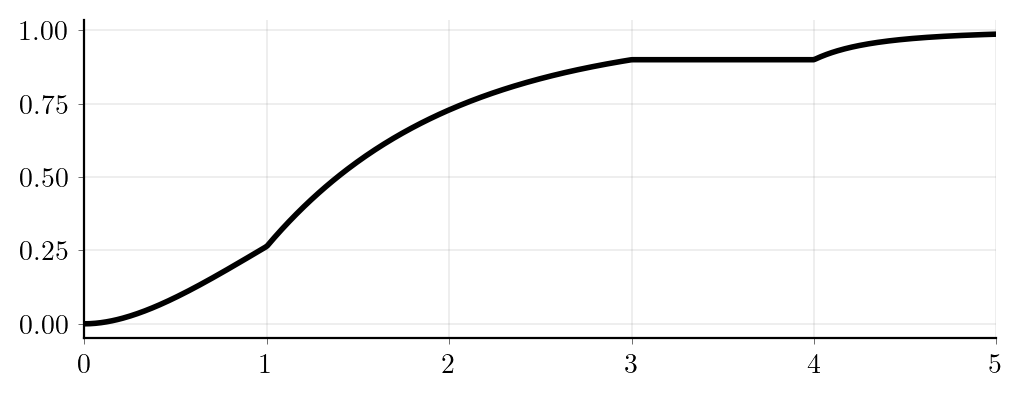

In [19]:
plt.plot(s,Ps,color ="k")  